# <center>CUSTOMER CHURN PREDICTION</center>

### Content
<br><b>What's Churn</b><br>
Churn is the likelyhood of a user/customer stoping using a particular service or product. Customer churn is one of the most important metrics for a growing business to evaluate. While it's not the happiest measure, it's a number that can give your company the hard truth about its customer retention.

It's hard to measure success if you don't measure the inevitable failures, too. While you strive for 100% of customers to stick with your company, that's simply unrealistic. That's where customer churn comes in.<br>
Customer churn is the percentage of customers that stopped using your company's product or service during a certain time frame. You can calculate churn rate by dividing the number of customers you lost during that time period -- say a quarter -- by the number of customers you had at the beginning of that time period.

For example, if you start your quarter with 400 customers and end with 380, your churn rate is 5% because you lost 5% of your customers.<a href="https://blog.hubspot.com/service/what-is-customer-churn">more dtails</a>.<br>On a large scale we can automate the churn prediction using machine larning models. This provides us with a tool to identify the customers/user who are likely to stop using our product/service and then we can devise a strategic mechansm to retain them for the continuity of our business.

<b>The data set includes information about:</b>

Customers who left within the last month – the column is called Churn<br>
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies<br>
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges<br>
Demographic info about customers – gender, age range, and if they have partners and dependents
<hr><b>Inspiration</b><br>
To explore this type of models and learn more about the subject.

#### 1. Import required libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from yellowbrick.classifier import ClassificationReport

np.random.seed(1234)

#### 2. Load our data

In [2]:
data = pd.read_csv('customer_churn_prediction.csv')

#### 3.Data exploration

Peek first 5 records in our data

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Get number of records and feature

In [4]:
print("We have ",data.shape[0]," records and ",data.shape[1]," features ")

We have  7043  records and  21  features 


List the dataset variables

In [5]:
list(data.columns)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

Group by Churn

In [6]:
data.groupby(['Churn'])['Churn'].count()

Churn
No     5174
Yes    1869
Name: Churn, dtype: int64

In [7]:
# pct of attrition // (Yes/total)*100 
len(data[data['Churn']=='Yes'])/data.shape[0] * 100

26.536987079369588

Text(0.5,1,'Attrition')

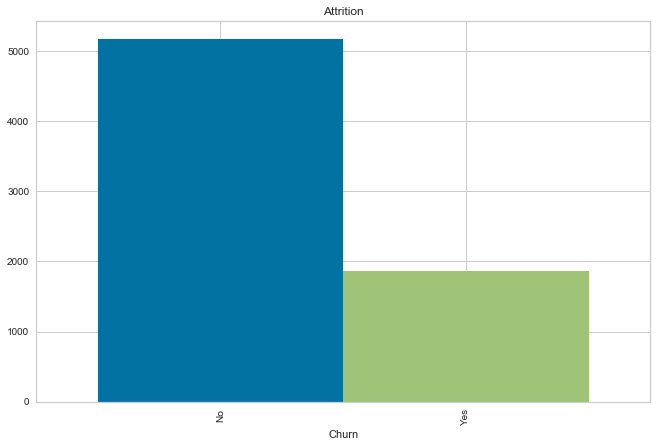

In [8]:
data.groupby(['Churn'])['Churn'].count().plot.bar(width=1,figsize=(11, 7)).set_title('Attrition')

Group by Gender

In [9]:
data.groupby(['gender','Churn'])['Churn'].count()

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
Name: Churn, dtype: int64

Text(0.5,1,'Attrition by Gender')

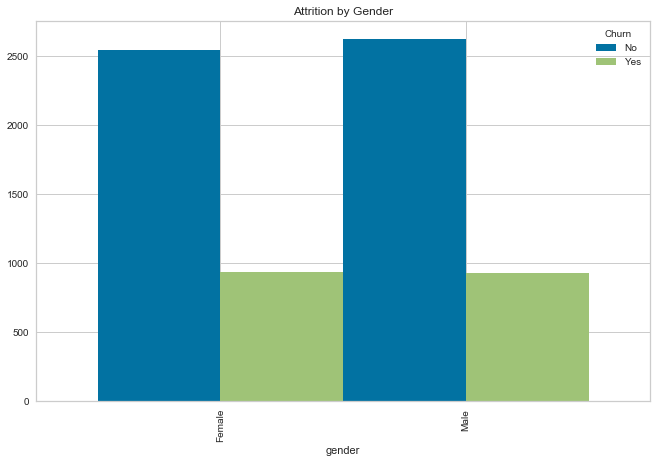

In [10]:
data.groupby(['gender','Churn'])['Churn'].count().unstack().plot(kind='bar',width=1,figsize=(11, 7)).set_title('Attrition by Gender')

Group by Partner

In [11]:
data.groupby(['Partner','Churn'])['Churn'].count()

Partner  Churn
No       No       2441
         Yes      1200
Yes      No       2733
         Yes       669
Name: Churn, dtype: int64

Text(0.5,1,'Attrition by Partner')

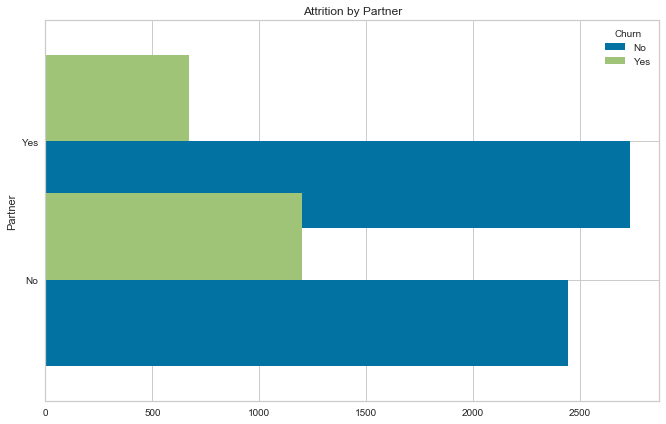

In [12]:
data.groupby(['Partner','Churn'])['Churn'].count().unstack().plot.barh(width=1.25,figsize=(11, 7)).set_title('Attrition by Partner')

Group by Contract

In [13]:
data.groupby(['Contract','Churn'])['Churn'].count()

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1307
                Yes       166
Two year        No       1647
                Yes        48
Name: Churn, dtype: int64

Text(0.5,1,'Attrition by Contract Type')

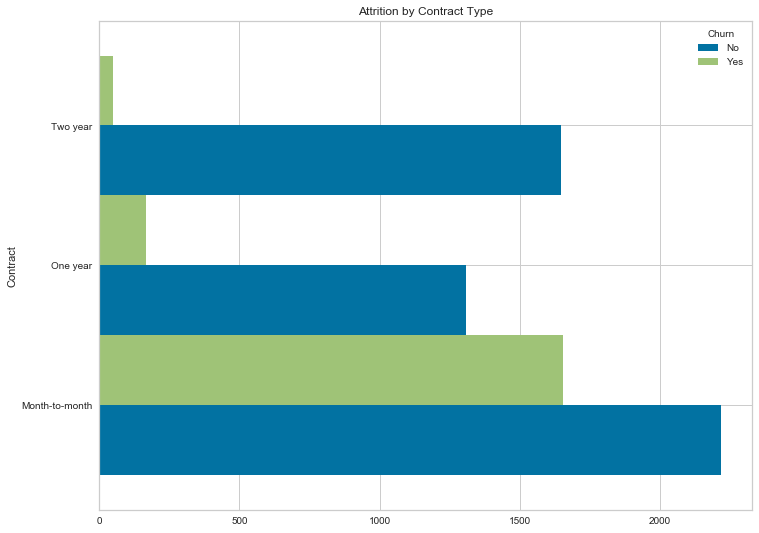

In [14]:
data.groupby(['Contract','Churn'])['Churn'].count().unstack().plot.barh(width=1,figsize=(11.7, 9)).set_title('Attrition by Contract Type')

Group by PhoneService

In [15]:
data.groupby(['PhoneService','Churn'])['Churn'].count()

PhoneService  Churn
No            No        512
              Yes       170
Yes           No       4662
              Yes      1699
Name: Churn, dtype: int64

Text(0.5,1,'Attrition by Phone Service')

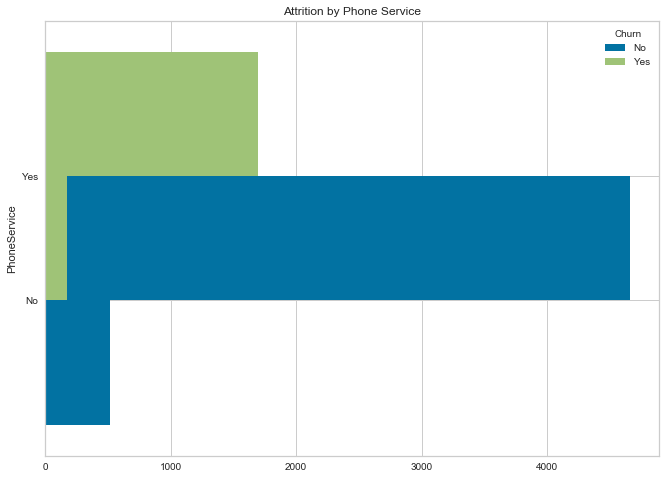

In [16]:
data.groupby(['PhoneService','Churn'])['Churn'].count().unstack().plot.barh(width=2,figsize=(11, 8)).set_title('Attrition by Phone Service')

Group by TechSupport

In [17]:
data.groupby(['TechSupport','Churn'])['Churn'].count()

TechSupport          Churn
No                   No       2027
                     Yes      1446
No internet service  No       1413
                     Yes       113
Yes                  No       1734
                     Yes       310
Name: Churn, dtype: int64

Text(0.5,1,'Attrition by Tech Support')

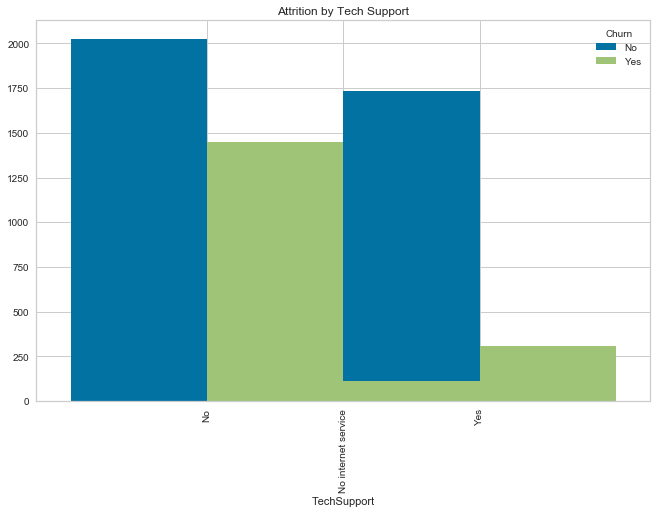

In [18]:
data.groupby(['TechSupport','Churn'])['Churn'].count().unstack().plot.bar(width=2,figsize=(11, 7)).set_title('Attrition by Tech Support')

Group by SeniorCitizen

In [19]:
data.groupby(['SeniorCitizen','Churn'])['Churn'].count()

SeniorCitizen  Churn
0              No       4508
               Yes      1393
1              No        666
               Yes       476
Name: Churn, dtype: int64

Text(0.5,1,'Attrition by Citizenship')

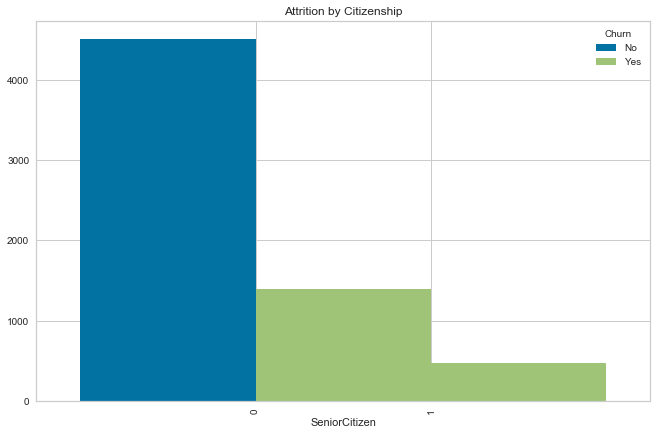

In [20]:
data.groupby(['SeniorCitizen','Churn'])['Churn'].count().unstack().plot.bar(width=2,figsize=(11, 7)).set_title('Attrition by Citizenship')

#### 4. Data Preprocessing

Dummy encode categorical features

In [21]:
data=pd.get_dummies(data,columns=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod'])

In [22]:
data.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,No,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,0,34,56.95,1889.5,No,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,Yes,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,No,0,1,1,0,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,0,2,70.70,151.65,Yes,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


View columns

In [23]:
data.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender_Female', 'gender_Male', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
      

Check data types

In [24]:
data.dtypes

customerID                                  object
SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                                object
Churn                                       object
gender_Female                                uint8
gender_Male                                  uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

Let's convert TotalCharges from object to numeric data type

In [25]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'].astype(str), errors='coerce')

Check for Missing data features

In [26]:
data.isna().sum()

customerID                                  0
SeniorCitizen                               0
tenure                                      0
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
gender_Female                               0
gender_Male                                 0
Partner_No                                  0
Partner_Yes                                 0
Dependents_No                               0
Dependents_Yes                              0
PhoneService_No                             0
PhoneService_Yes                            0
MultipleLines_No                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No                           0
OnlineSecurity_No internet service

Fill missing value for TotalCharges feature with mean 

In [27]:
data['TotalCharges']=data['TotalCharges'].fillna(data['TotalCharges'].mean())

Check missing value again to see the changes

In [28]:
data.isna().sum()

customerID                                 0
SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecu

#### 5. Feature Engineering

Get all features

In [29]:
X=data[['SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'gender_Female', 'gender_Male', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']]

Important Features

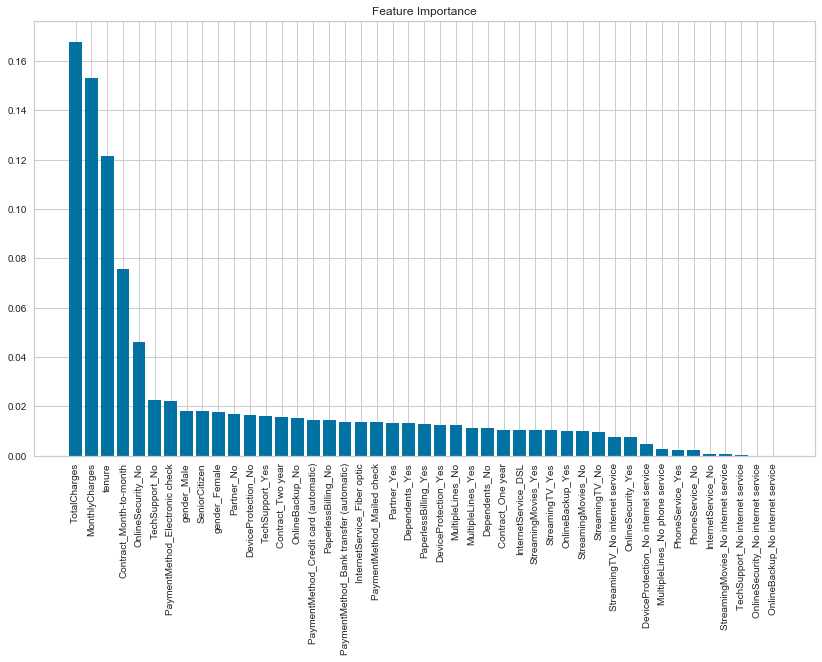

In [30]:
important_features=RandomForestClassifier()
important_features.fit(X,data['Churn'])

importances=important_features.feature_importances_
indices=np.argsort(importances)[::-1]
features = [X.columns[i] for i in indices]

plt.figure(figsize=(14,8))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), features, rotation=90)
plt.show()

Select important features

In [31]:
features=data[['SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'gender_Female', 'gender_Male', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
        'OnlineSecurity_No',
        'OnlineSecurity_Yes',
       'OnlineBackup_No', 
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']]

target=data['Churn']

Scaling our features

In [32]:
features=MinMaxScaler().fit_transform(features)

#### 6. Splitting our data into training and testing set

In [33]:
X_train, X_test, y_train, y_test=train_test_split(features,target, test_size=0.3,random_state=7)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4930, 40), (2113, 40), (4930,), (2113,))

#### 7. Create our Machine Learning Model

In [35]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)

In [36]:
prediction[0:10]

array(['No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes'],
      dtype=object)

#### 8. Evaluate our model

In [37]:
print("Accuracy is : ",accuracy_score(prediction, y_test)*100,"%")

Accuracy is :  77.75674396592522 %


In [38]:
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

          No       0.91      0.81      0.85      1707
         Yes       0.45      0.65      0.53       406

   micro avg       0.78      0.78      0.78      2113
   macro avg       0.68      0.73      0.69      2113
weighted avg       0.82      0.78      0.79      2113



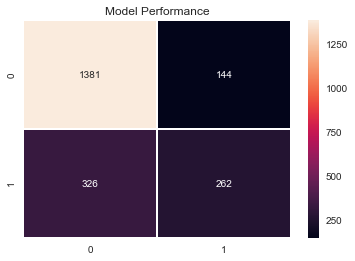

In [39]:
model_conf_matrix = confusion_matrix(y_test, prediction)
sns.heatmap(model_conf_matrix, annot=True,  fmt='', linewidths=.5);
title = 'Model Performance'
plt.title(title);

Uncomment the bellow code to install yellowbrick

In [40]:
# !conda install -c districtdatalabs yellowbrick

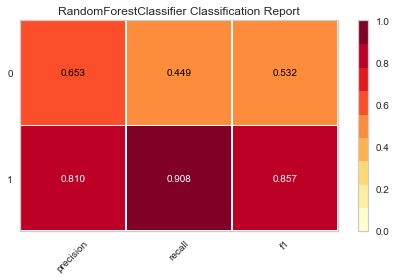

In [41]:
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(model, classes=['1','0'])
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()   

### 11. Observations
1. Approximately 36.12% of customers are prone to churning
2. Gender does not influence the rate of attrition. 
3. Customers who are not partners are more likely to churn leave than those who are partners.
4. Customers with short-term contract like (Month-to-Month) are more likely to churn that those with long-tern contract.
5. Clients without customer service support are 5 times more likely to leave the service than those that have tech support service.
6. Senior citizens are 3 times less likely to churn the service than other citizens.


### 12. Recommendations on Handling the customer churn problem
1. Improve the quality of service.
2. Strive to convert customers who are not partners to become partners.
3. Focus on making your customers have a long-term contract.
4. Provide support to all customers.
5. Engage with the customers likely to churn. Look at their profile, identify characteristics and analyse past interactions 
with your product and then simply talk to them. Ask for feedback, communicate latest developments that might be from interest or educate them on new product features. Approach customers likely to churn, but make sure that you come up with relevant things that may fit their individual needs. It will create a feeling of being understood and bind them to you and your business.

### 13. Model Improvement
To improve our model below are important tips;
1. Collect more information / features that describe user attrition behaviour.
2. Perform hyperparameter tunning. Finding optimum parameters can 
3. Use advanced algorithms such as neural network. Using boosted models and ensemble algorithms can improve the perfomance of the model.